In [84]:
from IPython.display import display , HTML

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [46]:
display(HTML("<h1>Business Problem<h1>"))
display(HTML("<h2>We are a marketing agency, and our main goal is to help our clients get the best return on their advertising spend. We ran two ad campaigns — one on Facebook and one on Google AdWords.Now, we want to find out which platform gives better results in terms of:<h2>"))
display(HTML("<h3>1. number of clicks,<h3>"))
display(HTML("<h3>2. number of conversions (people taking action), and<h3>"))
display(HTML("<h3>3. how cost-effective the ads are.<h3>"))

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
display(HTML("<h1>STEP 1: Dataset को खोलना और समझना<h1>"))

In [49]:
df = pd.read_csv("marketing_campaign.csv")
df.head()

Date Facebook Ad Campaign  Facebook Ad Views  Facebook Ad Clicks  \
0  1/1/2019             FB_Jan19               2116                  18   
1  1/2/2019             FB_Jan19               3106                  36   
2  1/3/2019             FB_Jan19               3105                  26   
3  1/4/2019             FB_Jan19               1107                  27   
4  1/5/2019             FB_Jan19               1317                  15   

   Facebook Ad Conversions Cost per Facebook Ad  \
0                        8                 $126   
1                       12                 $104   
2                        8                 $102   
3                        9                  $71   
4                        7                  $78   

  Facebook Click-Through Rate (Clicks / View)  \
0                                       0.83%   
1                                       1.15%   
2                                       0.84%   
3                                       2.45%   
4                                       1.10%   

  Facebook Conversion Rate (Conversions / Clicks)  \
0                                          42.73%   
1                                          34.04%   
2                                          31.45%   
3                                          34.76%   
4                                          47.59%   

  Facebook Cost per Click (Ad Cost / Clicks) AdWords Ad Campaign  \
0                                      $7.14            AW_Jan19   
1                                      $2.91            AW_Jan19   
2                                      $3.89            AW_Jan19   
3                                      $2.62            AW_Jan19   
4                                      $5.38            AW_Jan19   

   AdWords Ad Views  AdWords Ad Clicks  AdWords Ad Conversions  \
0              4984                 59                       5   
1              4022                 71                       6   
2              3863                 44                       4   
3              3911                 49                       5   
4              4070                 55                       7   

  Cost per AdWords Ad AdWords Click-Through Rate (Clicks / View)  \
0                $194                                      1.18%   
1                 $75                                      1.77%   
2                $141                                      1.13%   
3                $141                                      1.26%   
4                $133                                      1.36%   

  AdWords Conversion Rate (Conversions / Click)  \
0                                         8.40%   
1                                         7.80%   
2                                         9.59%   
3                                        11.08%   
4                                        12.22%   

  AdWords Cost per Click (Ad Cost / Clicks)  
0                                     $3.30  
1                                     $1.05  
2                                     $3.23  
3                                     $2.86  
4                                     $2.40

In [50]:
df.shape

(365, 17)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

In [52]:
df.isnull().sum()

Date                                               0
Facebook Ad Campaign                               0
Facebook Ad Views                                  0
Facebook Ad Clicks                                 0
Facebook Ad Conversions                            0
Cost per Facebook Ad                               0
Facebook Click-Through Rate (Clicks / View)        0
Facebook Conversion Rate (Conversions / Clicks)    0
Facebook Cost per Click (Ad Cost / Clicks)         0
AdWords Ad Campaign                                0
AdWords Ad Views                                   0
AdWords Ad Clicks                                  0
AdWords Ad Conversions                             0
Cost per AdWords Ad                                0
AdWords Click-Through Rate (Clicks / View)         0
AdWords Conversion Rate (Conversions / Click)      0
AdWords Cost per Click (Ad Cost / Clicks)          0
dtype: int64

In [53]:
display(HTML("<h1>अब चलते हैं STEP 2: Key Metrics Calculate करना (Per Platform)<h1>"))

In [54]:
# Convert all related columns to numeric (errors='coerce' से गलत values NaN बन जाएंगी)
cols_to_convert = [
    'Facebook Ad Views',
    'Facebook Ad Clicks',
    'Facebook Ad Conversions',
    'Cost per Facebook Ad',
    'AdWords Ad Views',
    'AdWords Ad Clicks',
    'AdWords Ad Conversions',
    'Cost per AdWords Ad'
]

for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)  # Remove all non-numeric chars except dot
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float


In [55]:
# Facebook Manual Calculations
df["FB_CTR_manual"] = df["Facebook Ad Clicks"] / df["Facebook Ad Views"]
df["FB_Conversion_manual"] = df["Facebook Ad Conversions"] / df["Facebook Ad Clicks"]
df["FB_CPC_manual"] = df["Cost per Facebook Ad"] / df["Facebook Ad Clicks"]

# AdWords Manual Calculations
df["AD_CTR_manual"] = df["AdWords Ad Clicks"] / df["AdWords Ad Views"]
df["AD_Conversion_manual"] = df["AdWords Ad Conversions"] / df["AdWords Ad Clicks"]
df["AD_CPC_manual"] = df["Cost per AdWords Ad"] / df["AdWords Ad Clicks"]


In [56]:
df["FB_CTR_manual"] 

0      0.008507
1      0.011590
2      0.008374
3      0.024390
4      0.011390
         ...   
360    0.015741
361    0.045695
362    0.015079
363    0.016727
364    0.040816
Name: FB_CTR_manual, Length: 365, dtype: float64

In [57]:
df["Facebook Click-Through Rate (Clicks / View)"]

0      0.83%
1      1.15%
2      0.84%
3      2.45%
4      1.10%
       ...  
360    1.57%
361    4.55%
362    1.50%
363    1.68%
364    4.06%
Name: Facebook Click-Through Rate (Clicks / View), Length: 365, dtype: object

In [58]:
display(HTML("<h1>So , We have Correctl Of Data<h1>"))

In [59]:
df

Date Facebook Ad Campaign  Facebook Ad Views  Facebook Ad Clicks  \
0      1/1/2019             FB_Jan19               2116                  18   
1      1/2/2019             FB_Jan19               3106                  36   
2      1/3/2019             FB_Jan19               3105                  26   
3      1/4/2019             FB_Jan19               1107                  27   
4      1/5/2019             FB_Jan19               1317                  15   
..          ...                  ...                ...                 ...   
360  12/27/2019             FB_Dec19               3240                  51   
361  12/28/2019             FB_Dec19               1510                  69   
362  12/29/2019             FB_Dec19               2918                  44   
363  12/30/2019             FB_Dec19               2212                  37   
364  12/31/2019             FB_Dec19               1470                  60   

     Facebook Ad Conversions  Cost per Facebook Ad  \
0                          8                   126   
1                         12                   104   
2                          8                   102   
3                          9                    71   
4                          7                    78   
..                       ...                   ...   
360                       13                    63   
361                       18                    97   
362                       13                    49   
363                        8                   102   
364                       17                    99   

    Facebook Click-Through Rate (Clicks / View)  \
0                                         0.83%   
1                                         1.15%   
2                                         0.84%   
3                                         2.45%   
4                                         1.10%   
..                                          ...   
360                                       1.57%   
361                                       4.55%   
362                                       1.50%   
363                                       1.68%   
364                                       4.06%   

    Facebook Conversion Rate (Conversions / Clicks)  \
0                                            42.73%   
1                                            34.04%   
2                                            31.45%   
3                                            34.76%   
4                                            47.59%   
..                                              ...   
360                                          25.89%   
361                                          25.82%   
362                                          29.11%   
363                                          22.70%   
364                                          28.38%   

    Facebook Cost per Click (Ad Cost / Clicks) AdWords Ad Campaign  ...  \
0                                        $7.14            AW_Jan19  ...   
1                                        $2.91            AW_Jan19  ...   
2                                        $3.89            AW_Jan19  ...   
3                                        $2.62            AW_Jan19  ...   
4                                        $5.38            AW_Jan19  ...   
..                                         ...                 ...  ...   
360                                      $1.24            AW_Dec19  ...   
361                                      $1.42            AW_Dec19  ...   
362                                      $1.11            AW_Dec19  ...   
363                                      $2.75            AW_Dec19  ...   
364                                      $1.65            AW_Dec19  ...   

     Cost per AdWords Ad  AdWords Click-Through Rate (Clicks / View)  \
0                    194                                       1.18%   
1                     75                                       1.77%   
2                    1

In [27]:
total_fb_conversions = df["Facebook Ad Conversions"].sum()
total_ad_conversions = df["AdWords Ad Conversions"].sum()
total_conversions = total_fb_conversions + total_ad_conversions
print("Total Facebook Conversions:", total_fb_conversions)
print("Total AdWords Conversions:", total_ad_conversions)
print("Total Conversions (Both):", total_conversions)

Total Facebook Conversions: 4286
Total AdWords Conversions: 2183
Total Conversions (Both): 6469


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Date                                             365 non-null    object 
 1   Facebook Ad Campaign                             365 non-null    object 
 2   Facebook Ad Views                                365 non-null    int64  
 3   Facebook Ad Clicks                               365 non-null    int64  
 4   Facebook Ad Conversions                          365 non-null    int64  
 5   Cost per Facebook Ad                             365 non-null    int64  
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object 
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object 
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object 
 9   AdWords Ad Campaign             

In [61]:
df["Cost per Facebook Ad"].sum()

np.int64(32040)

In [62]:
# Facebook Total Ad Spend
total_fb_spend = df["Cost per Facebook Ad"].sum()

# AdWords Total Ad Spend
total_ad_spend = df["Cost per AdWords Ad"].sum()

# Combined Total Spend
total_total_spend = total_fb_spend + total_ad_spend

print("📊 Total Facebook Spend:", total_fb_spend)
print("📊 Total AdWords Spend:", total_ad_spend)
print("💰 Total Combined Spend:", total_total_spend)


📊 Total Facebook Spend: 32040
📊 Total AdWords Spend: 49266
💰 Total Combined Spend: 81306


In [63]:
df

Date Facebook Ad Campaign  Facebook Ad Views  Facebook Ad Clicks  \
0      1/1/2019             FB_Jan19               2116                  18   
1      1/2/2019             FB_Jan19               3106                  36   
2      1/3/2019             FB_Jan19               3105                  26   
3      1/4/2019             FB_Jan19               1107                  27   
4      1/5/2019             FB_Jan19               1317                  15   
..          ...                  ...                ...                 ...   
360  12/27/2019             FB_Dec19               3240                  51   
361  12/28/2019             FB_Dec19               1510                  69   
362  12/29/2019             FB_Dec19               2918                  44   
363  12/30/2019             FB_Dec19               2212                  37   
364  12/31/2019             FB_Dec19               1470                  60   

     Facebook Ad Conversions  Cost per Facebook Ad  \
0                          8                   126   
1                         12                   104   
2                          8                   102   
3                          9                    71   
4                          7                    78   
..                       ...                   ...   
360                       13                    63   
361                       18                    97   
362                       13                    49   
363                        8                   102   
364                       17                    99   

    Facebook Click-Through Rate (Clicks / View)  \
0                                         0.83%   
1                                         1.15%   
2                                         0.84%   
3                                         2.45%   
4                                         1.10%   
..                                          ...   
360                                       1.57%   
361                                       4.55%   
362                                       1.50%   
363                                       1.68%   
364                                       4.06%   

    Facebook Conversion Rate (Conversions / Clicks)  \
0                                            42.73%   
1                                            34.04%   
2                                            31.45%   
3                                            34.76%   
4                                            47.59%   
..                                              ...   
360                                          25.89%   
361                                          25.82%   
362                                          29.11%   
363                                          22.70%   
364                                          28.38%   

    Facebook Cost per Click (Ad Cost / Clicks) AdWords Ad Campaign  ...  \
0                                        $7.14            AW_Jan19  ...   
1                                        $2.91            AW_Jan19  ...   
2                                        $3.89            AW_Jan19  ...   
3                                        $2.62            AW_Jan19  ...   
4                                        $5.38            AW_Jan19  ...   
..                                         ...                 ...  ...   
360                                      $1.24            AW_Dec19  ...   
361                                      $1.42            AW_Dec19  ...   
362                                      $1.11            AW_Dec19  ...   
363                                      $2.75            AW_Dec19  ...   
364                                      $1.65            AW_Dec19  ...   

     Cost per AdWords Ad  AdWords Click-Through Rate (Clicks / View)  \
0                    194                                       1.18%   
1                     75                                       1.77%   
2                    1

In [65]:
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].replace(r'[\$,]', '', regex=True).astype(float)
df['AdWords Cost per Click (Ad Cost / Clicks)'] = df['AdWords Cost per Click (Ad Cost / Clicks)'].replace(r'[\$,]', '', regex=True).astype(float)
df

Date Facebook Ad Campaign  Facebook Ad Views  Facebook Ad Clicks  \
0      1/1/2019             FB_Jan19               2116                  18   
1      1/2/2019             FB_Jan19               3106                  36   
2      1/3/2019             FB_Jan19               3105                  26   
3      1/4/2019             FB_Jan19               1107                  27   
4      1/5/2019             FB_Jan19               1317                  15   
..          ...                  ...                ...                 ...   
360  12/27/2019             FB_Dec19               3240                  51   
361  12/28/2019             FB_Dec19               1510                  69   
362  12/29/2019             FB_Dec19               2918                  44   
363  12/30/2019             FB_Dec19               2212                  37   
364  12/31/2019             FB_Dec19               1470                  60   

     Facebook Ad Conversions  Cost per Facebook Ad  \
0                          8                   126   
1                         12                   104   
2                          8                   102   
3                          9                    71   
4                          7                    78   
..                       ...                   ...   
360                       13                    63   
361                       18                    97   
362                       13                    49   
363                        8                   102   
364                       17                    99   

    Facebook Click-Through Rate (Clicks / View)  \
0                                         0.83%   
1                                         1.15%   
2                                         0.84%   
3                                         2.45%   
4                                         1.10%   
..                                          ...   
360                                       1.57%   
361                                       4.55%   
362                                       1.50%   
363                                       1.68%   
364                                       4.06%   

    Facebook Conversion Rate (Conversions / Clicks)  \
0                                            42.73%   
1                                            34.04%   
2                                            31.45%   
3                                            34.76%   
4                                            47.59%   
..                                              ...   
360                                          25.89%   
361                                          25.82%   
362                                          29.11%   
363                                          22.70%   
364                                          28.38%   

     Facebook Cost per Click (Ad Cost / Clicks) AdWords Ad Campaign  ...  \
0                                          7.14            AW_Jan19  ...   
1                                          2.91            AW_Jan19  ...   
2                                          3.89            AW_Jan19  ...   
3                                          2.62            AW_Jan19  ...   
4                                          5.38            AW_Jan19  ...   
..                                          ...                 ...  ...   
360                                        1.24            AW_Dec19  ...   
361                                        1.42            AW_Dec19  ...   
362                                        1.11            AW_Dec19  ...   
363                                        2.75            AW_Dec19  ...   
364                                        1.65            AW_Dec19  ...   

     Cost per AdWords Ad  AdWords Click-Through Rate (Clicks / View)  \
0                    194                                       1.18%   
1                     75                                       1.77%   
2         

In [66]:
fb_conversions = df["Facebook Ad Conversions"].sum()
ad_conversions = df['AdWords Ad Conversions'].sum()
fb_total_spend = df['Cost per Facebook Ad'].sum()
ad_total_spend = df['Cost per AdWords Ad'].sum()
# Facebook
fb_ctr = df['Facebook Ad Clicks'].sum() / df['Facebook Ad Views'].sum()
fb_conversion_rate = fb_conversions / df['Facebook Ad Clicks'].sum()

# AdWords
ad_ctr = df['AdWords Ad Clicks'].sum() / df['AdWords Ad Views'].sum()
ad_conversion_rate = ad_conversions / df['AdWords Ad Clicks'].sum()


In [67]:
print("📘 Facebook Metrics:")
print(f"Total Spend: ₹{fb_total_spend:.2f}")
print(f"Total Conversions: {fb_conversions}")
print(f"CTR: {fb_ctr:.2%}")
print(f"Conversion Rate: {fb_conversion_rate:.2%}")

print("\n🔴 AdWords Metrics:")
print(f"Total Spend: ₹{ad_total_spend:.2f}")
print(f"Total Conversions: {ad_conversions}")
print(f"CTR: {ad_ctr:.2%}")
print(f"Conversion Rate: {ad_conversion_rate:.2%}")


📘 Facebook Metrics:
Total Spend: ₹32040.00
Total Conversions: 4286
CTR: 2.02%
Conversion Rate: 26.66%

🔴 AdWords Metrics:
Total Spend: ₹49266.00
Total Conversions: 2183
CTR: 1.28%
Conversion Rate: 9.90%


In [69]:
df.drop(["FB_CTR_manual","FB_Conversion_manual","FB_CPC_manual","AD_CTR_manual","AD_Conversion_manual","AD_CPC_manual"],axis=1,inplace=True)

In [70]:
df

Date Facebook Ad Campaign  Facebook Ad Views  Facebook Ad Clicks  \
0      1/1/2019             FB_Jan19               2116                  18   
1      1/2/2019             FB_Jan19               3106                  36   
2      1/3/2019             FB_Jan19               3105                  26   
3      1/4/2019             FB_Jan19               1107                  27   
4      1/5/2019             FB_Jan19               1317                  15   
..          ...                  ...                ...                 ...   
360  12/27/2019             FB_Dec19               3240                  51   
361  12/28/2019             FB_Dec19               1510                  69   
362  12/29/2019             FB_Dec19               2918                  44   
363  12/30/2019             FB_Dec19               2212                  37   
364  12/31/2019             FB_Dec19               1470                  60   

     Facebook Ad Conversions  Cost per Facebook Ad  \
0                          8                   126   
1                         12                   104   
2                          8                   102   
3                          9                    71   
4                          7                    78   
..                       ...                   ...   
360                       13                    63   
361                       18                    97   
362                       13                    49   
363                        8                   102   
364                       17                    99   

    Facebook Click-Through Rate (Clicks / View)  \
0                                         0.83%   
1                                         1.15%   
2                                         0.84%   
3                                         2.45%   
4                                         1.10%   
..                                          ...   
360                                       1.57%   
361                                       4.55%   
362                                       1.50%   
363                                       1.68%   
364                                       4.06%   

    Facebook Conversion Rate (Conversions / Clicks)  \
0                                            42.73%   
1                                            34.04%   
2                                            31.45%   
3                                            34.76%   
4                                            47.59%   
..                                              ...   
360                                          25.89%   
361                                          25.82%   
362                                          29.11%   
363                                          22.70%   
364                                          28.38%   

     Facebook Cost per Click (Ad Cost / Clicks) AdWords Ad Campaign  \
0                                          7.14            AW_Jan19   
1                                          2.91            AW_Jan19   
2                                          3.89            AW_Jan19   
3                                          2.62            AW_Jan19   
4                                          5.38            AW_Jan19   
..                                          ...                 ...   
360                                        1.24            AW_Dec19   
361                                        1.42            AW_Dec19   
362                                        1.11            AW_Dec19   
363                                        2.75            AW_Dec19   
364                                        1.65            AW_Dec19   

     AdWords Ad Views  AdWords Ad Clicks  AdWords Ad Conversions  \
0                4984                 59                       5   
1                4022                 71                       6   
2                3863                 44                       4   
3             

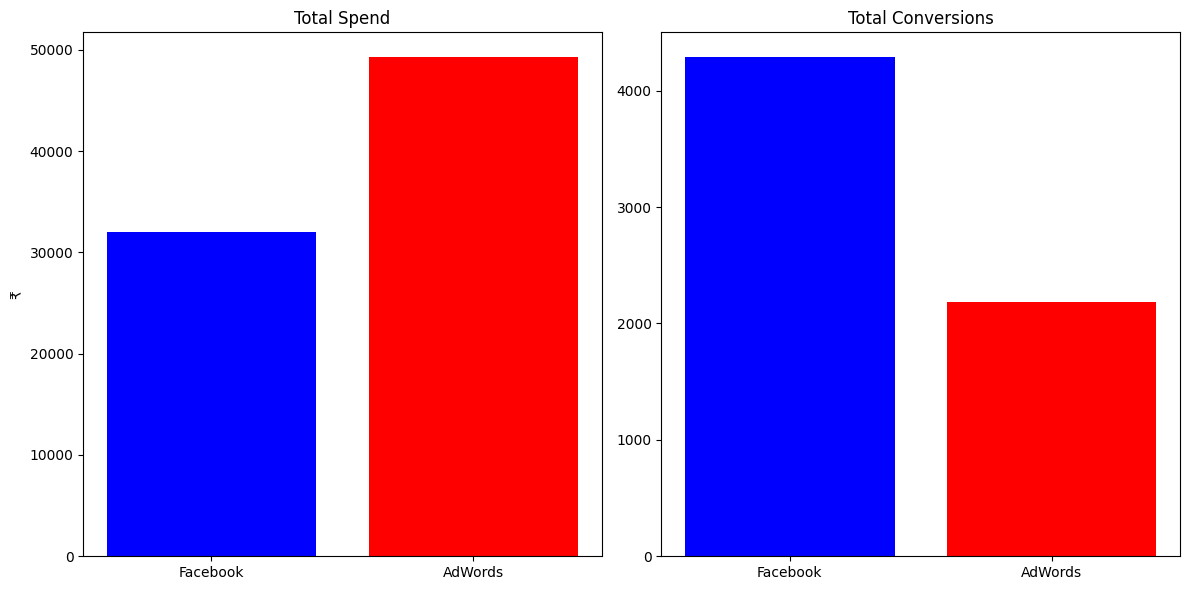

In [71]:
import matplotlib.pyplot as plt

# Bar Chart for Spend & Conversions
labels = ['Facebook', 'AdWords']
spend = [32040, 49266]
conversions = [4286, 2183]
ctr = [2.02, 1.28]
conversion_rate = [26.66, 9.90]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(labels, spend, color=['blue', 'red'])
plt.title('Total Spend')
plt.ylabel('₹')

plt.subplot(1, 2, 2)
plt.bar(labels, conversions, color=['blue', 'red'])
plt.title('Total Conversions')

plt.tight_layout()
plt.show()


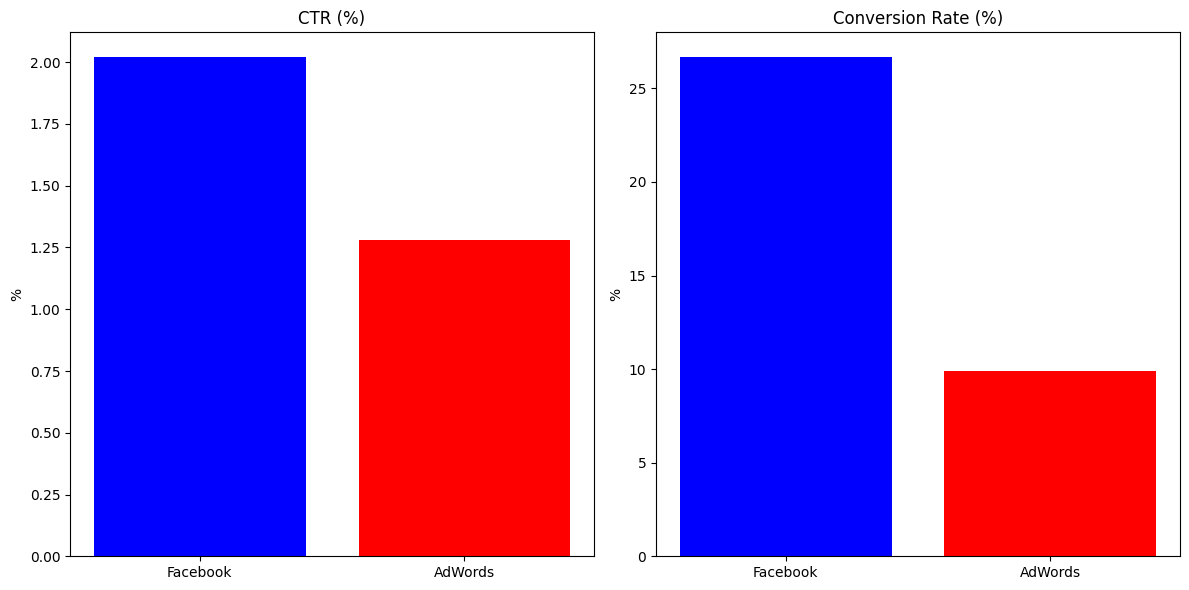

In [72]:
# CTR and Conversion Rate Chart
import matplotlib.pyplot as plt

labels = ['Facebook', 'AdWords']
ctr = [2.02, 1.28]
cr = [26.66, 9.90]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(labels, ctr, color=['blue', 'red'])
plt.title('CTR (%)')
plt.ylabel('%')

plt.subplot(1, 2, 2)
plt.bar(labels, cr, color=['blue', 'red'])
plt.title('Conversion Rate (%)')
plt.ylabel('%')

plt.tight_layout()
plt.show()


In [75]:
# 📊 Facebook vs AdWords Marketing Campaign Analysis

## Objective
To analyze and compare the performance of Facebook and AdWords ad campaigns over a 1-year period based on cost, engagement, and conversions.

## Dataset
The dataset includes:
- Daily ad views, clicks, and conversions
- Cost per ad and click metrics
- Precomputed CTR and conversion rates

Time Range: 365 days


SyntaxError: invalid syntax (1393140181.py, line 4)

In [78]:
df.to_csv("output.csv", index=False)


In [80]:
Facebook_rate = df["Facebook Ad Conversions"] / df["Facebook Ad Clicks"]
Adword_rate = df["AdWords Ad Conversions"] / df["AdWords Ad Clicks"]

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(Facebook_rate, Adword_rate)
print("P-value:", p_value)


P-value: 1.8096808349786574e-295


In [90]:

facebook_avg = Facebook_rate.mean()
adwords_avg = Adword_rate.mean()
print(facebook_avg)
print(adwords_avg)

0.27180294649294123
0.10206838155892026


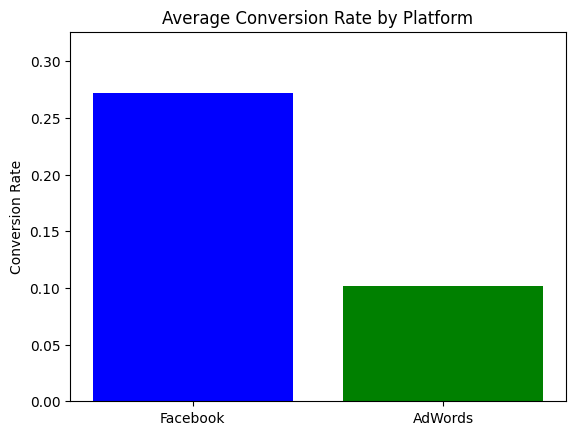

In [92]:
import matplotlib.pyplot as plt

platforms = ['Facebook', 'AdWords']
avg_rates = [facebook_avg, adwords_avg]

plt.bar(platforms, avg_rates, color=['blue', 'green'])
plt.title('Average Conversion Rate by Platform')
plt.ylabel('Conversion Rate')
plt.ylim(0, max(avg_rates)*1.2)
plt.show()
